# Huasheng Nie <font color='blue'> Score: 39/40 </font>

#### <font color='blue'> Please see the corresponding cells for comments (in blue) on each individual question, if there's any. </font>

# MTH9879 Homework 1
## **Name: Huasheng Nie**
Assigned: February 2, 2016.
Due: February 16, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points)  <font color=blue> Score: 4/4 </font>

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

### 1. Answer

 - The seller used constant participation rate to split orders.

 - Traders would like to split a "parent" order into mutiple "child" orders to reduce market impact.  However, it becomes a problem when the "parent" order is large as in this example.  A large sell order may affect the market's liquidity due to a very sharp price decrease.

 - There are some stop-loss exits in case of the price droping too harply. This mechanism could stop automatically and immediately.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points) <font color=blue> Score: 4/4 </font>

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

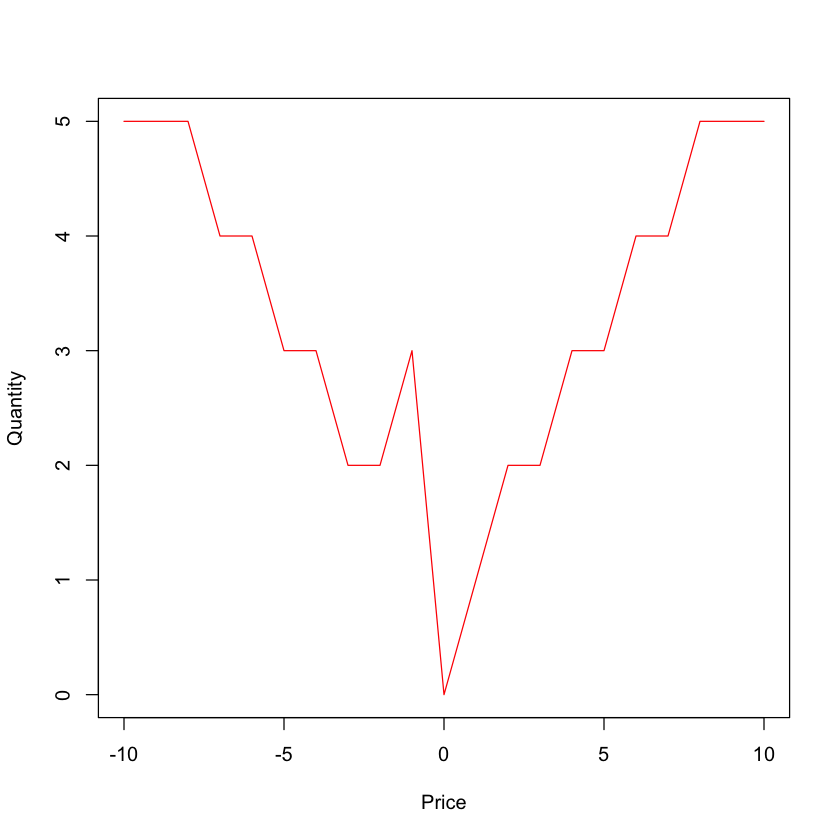

In [2]:
logging <- F # Very important for speed!
alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()
limitBuyOrder(price = bestBid())
limitBuyOrder(price = bestBid())
bookPlot(10)

### 3. (16 points) <font color=blue> Score: 16/16 </font>

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

order,simulation_slope,empirical_slope,simulation_depth,empirical_depth
I,0.65205,0.500,5.24665,5
II,0.75278,0.625,5.11666,5
III,0.68964,0.600,6.02641,6
IV,0.97015,0.800,7.29469,8


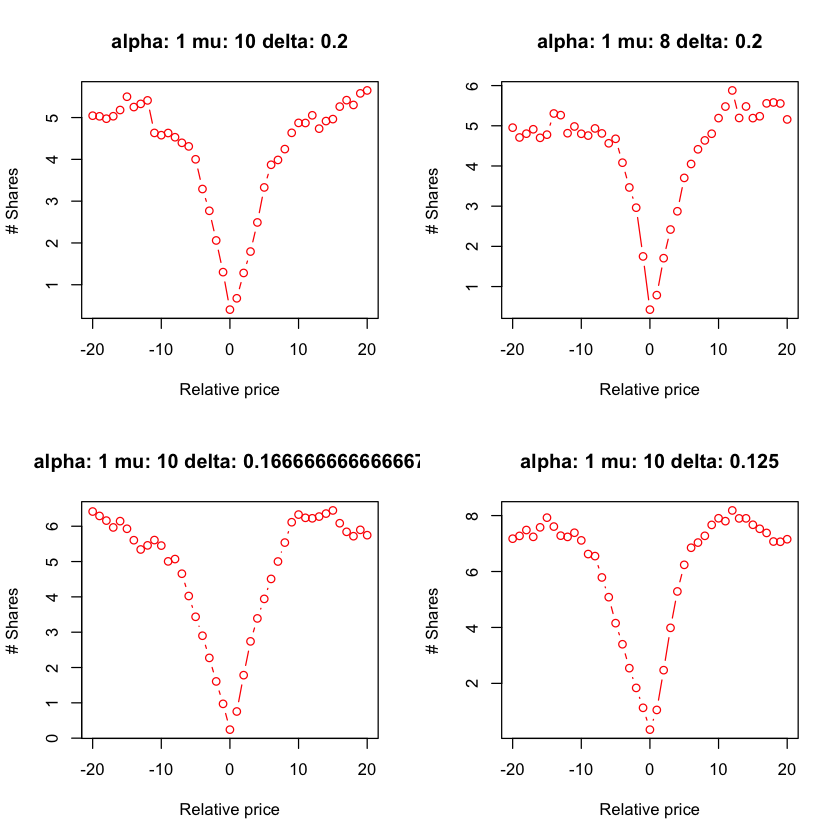

In [3]:
alpha_4 <- c(1,1,1,1)
mu_4 <- c(10,8,10,10)
delta_4 <- c(1/5,1/5,1/6,1/8)
par(mfrow=c(2,2)) ##combine the result
empirical_slope<-c()
simulation_slope<-c()
empirical_depth<-c()
simulation_depth<-c()
for (i in 1:4)
{
    alpha<-alpha_4[i]
    mu<-mu_4[i]
    delta<-delta_4[i]
    empirical_slope<-c(empirical_slope,alpha^2/mu/delta)
    empirical_depth<-c(empirical_depth,alpha/delta)
    initializeBook5()
    # Burn in for 100 events
    for(count in 1:100){
      generateEvent()
    }
    numEvents <- 10000 # Average over 10,000 events
    avgBookShape <- bookShape(20)/numEvents
    for(count in 2:numEvents){
      generateEvent()
      avgBookShape <- avgBookShape+bookShape(20)/numEvents
    }
    simulation_slope<-c(simulation_slope,mean(abs(diff(avgBookShape))[16:25]))
    simulation_depth<-c(simulation_depth,mean(avgBookShape[c(1:5,37:41)])) ##5 points at each side 
    # select the midest 10 points' avg to get an approximation of slope
    plot(-20:20,avgBookShape,main=paste("alpha:",alpha,"mu:",mu,"delta:",delta ),xlab="Relative price",ylab="# Shares", col="red", type="b")
}
order=c("I","II","III","IV")
tbl=data.frame(order,simulation_slope,empirical_slope,simulation_depth,empirical_depth)
tbl
 


### The following code sets up the data required for Problem 4.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points) <font color=blue> Score: 12/12 </font>

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [2]:
head(data.frame(ziSimResults))

,bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
1,-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
2,-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
3,-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
4,0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
5,-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
6,-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

In [3]:
##(a)
mids<-c()
sds<-c()
for (i in 1:10)
{
    mid <- (ziSimResults[[i]]$bid + ziSimResults[[i]]$ask)/2
    mids<-c(mids,mean(mid))
    sds<-c(sds,sd(mid))
}


In [8]:
typeof(mids)

[1] "double"

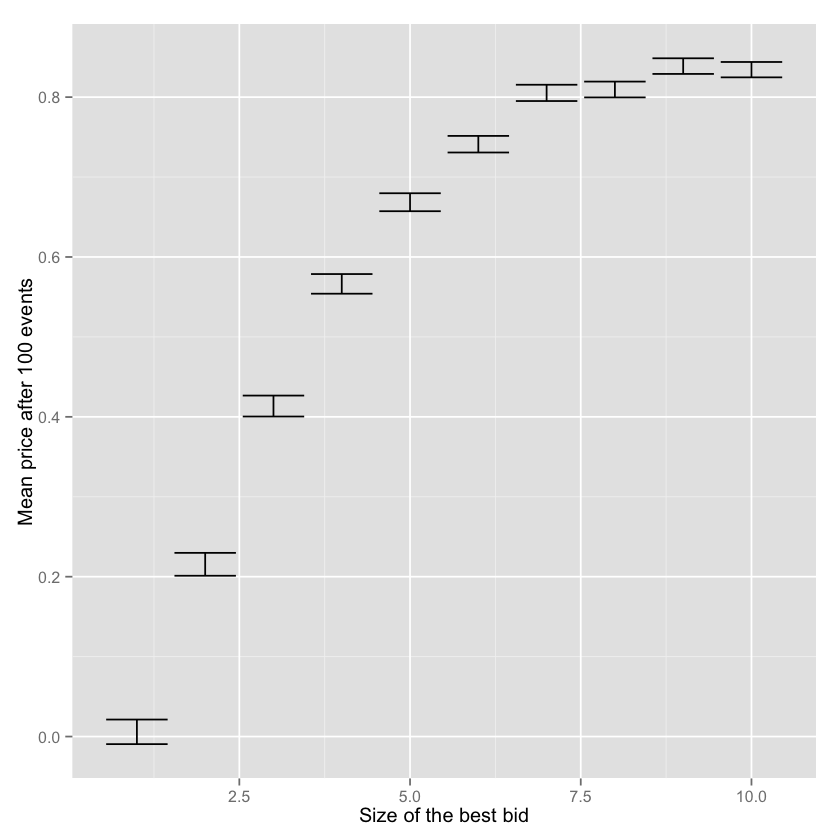

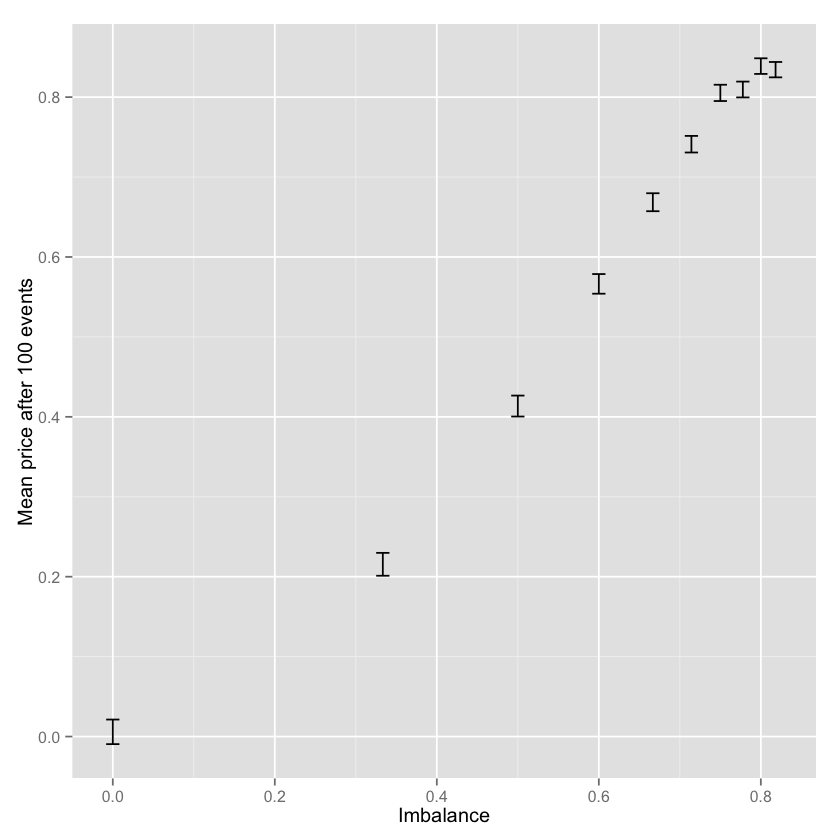

In [7]:
sds=sds/100
library(ggplot2)
ggplot(NULL,aes(x=1:10,y=mids))+geom_errorbar(aes(ymin=mids-sds,ymax=mids+sds))+xlab("Size of the best bid")+ylab("Mean price after 100 events")
ggplot(NULL,aes(x=(1:10-1)/(1:10+1),y=mids))+geom_errorbar(aes(ymin=mids-sds,ymax=mids+sds))+xlab("Imbalance")+ylab("Mean price after 100 events")

####  (d) 
If the number of buyers is larger than the number of sellers, the price will increase in the future.

## Is the market price a martingale?

### 5. (4 points)  <font color=blue> Score: 3/4 </font>

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

### 5. Answer 

#### Answer:

 - If the orderbook is imbalanced, the asset prices are not martingales according to ZI model. And also in real-market, transaction costs is also another reason that asset prices are not martingales. Personally, I believe in high frequency trading and technical data analysis, these are all based in assumption that expected price changes should not be zero.

 - As for a risk-neutral world, the asset prices are martingales, as market should be arbitrage-free in risk-neutral world.
 
 
<br>

<font color=blue> (1pt off)
The key point is that microstructure models show that if you condition on the state of the book or the history
of order flow, you can predict future prices. If you don’t condition either on the state of the
order book or on the history of order flow (as might be typically the case for delta hedgers),
the price process can be a martingale.
</font>